In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers,models

In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
df_train.shape

(42000, 785)

In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels = df_train['label']
data = df_train.drop(columns=['label'])

In [7]:
print(data.shape,labels.shape,df_test.shape)

(42000, 784) (42000,) (28000, 784)


In [8]:
#reshaping the train and test data
data = data.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [9]:
print(data.shape,df_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [10]:
#normalizing the data
data = data/255.0
df_test = df_test/255.0

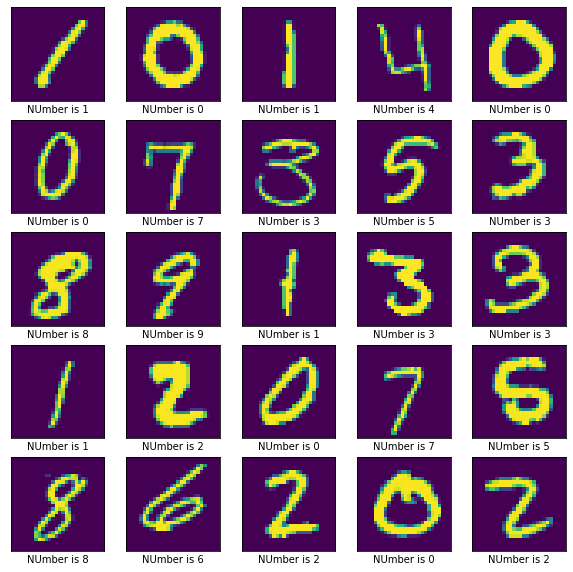

In [11]:
#visualize some of data

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i])
    plt.xlabel("NUmber is {}".format(labels[i]))

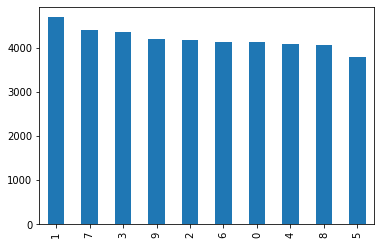

In [12]:
labels.value_counts().plot(kind='bar');

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,random_state=42,test_size=0.2)

In [14]:
print(x_train.shape,y_train.shape)

(33600, 28, 28, 1) (33600,)


In [15]:
y_train.dtype

dtype('int64')

## Model

In [16]:
model = models.Sequential([
    #cnn 
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense layers
    layers.Flatten(),
    
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10,activation='softmax')
])

In [17]:
#complie the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [19]:
#callback / early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [20]:
#training the model
hist = model.fit(x_train,y_train,epochs=15,validation_split=0.1,callbacks=[callback])

Epoch 1/15
945/945 [==============================] - 8s 4ms/step - loss: 1.3400 - accuracy: 0.5199 - val_loss: 0.1475 - val_accuracy: 0.9607
Epoch 2/15
945/945 [==============================] - 4s 4ms/step - loss: 0.2120 - accuracy: 0.9478 - val_loss: 0.1203 - val_accuracy: 0.9679
Epoch 3/15
945/945 [==============================] - 3s 4ms/step - loss: 0.1448 - accuracy: 0.9669 - val_loss: 0.0924 - val_accuracy: 0.9744
Epoch 4/15
945/945 [==============================] - 4s 4ms/step - loss: 0.1100 - accuracy: 0.9743 - val_loss: 0.0986 - val_accuracy: 0.9789
Epoch 5/15
945/945 [==============================] - 4s 4ms/step - loss: 0.0958 - accuracy: 0.9764 - val_loss: 0.1034 - val_accuracy: 0.9795
Epoch 6/15
945/945 [==============================] - 3s 4ms/step - loss: 0.0857 - accuracy: 0.9810 - val_loss: 0.1023 - val_accuracy: 0.9774
Epoch 7/15
945/945 [==============================] - 3s 4ms/step - loss: 0.0669 - accuracy: 0.9840 - val_loss: 0.1017 - val_accuracy: 0.9795
Epoch 

In [21]:
#testing the model
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9831


[0.09608144313097, 0.9830952286720276]

> Some plots

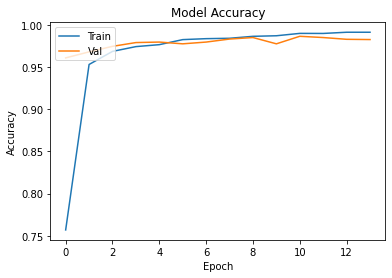

In [22]:
#visualize the models accuray
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

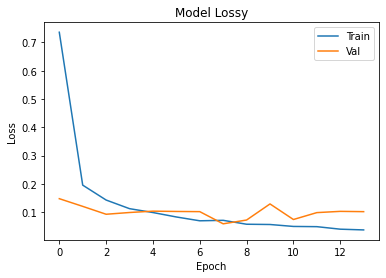

In [23]:
#visualize models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Lossy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [24]:
#classification report 
from sklearn.metrics import classification_report,confusion_matrix

test_pred = model.predict(x_test)
test_pred = [np.argmax(i) for i in test_pred]

print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       912
           2       0.98      0.97      0.98       852
           3       0.97      1.00      0.98       909
           4       0.99      0.98      0.99       840
           5       0.98      0.97      0.98       711
           6       0.99      0.98      0.99       795
           7       0.98      0.98      0.98       899
           8       0.99      0.98      0.98       841
           9       0.97      0.99      0.98       825

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [25]:
#confusion matrix
print(confusion_matrix(test_pred,y_test))

[[808   0   0   0   2   1   1   1   0   3]
 [  0 904   2   0   1   0   0   3   2   0]
 [  1   1 828  11   0   1   0   9   1   0]
 [  0   1   0 905   0   2   0   1   0   0]
 [  1   0   3   0 827   0   1   1   2   5]
 [  0   0   1  11   0 690   2   0   1   6]
 [  3   1   1   0   4   5 780   0   1   0]
 [  0   2  11   2   1   0   0 877   1   5]
 [  1   0   0   6   1   2   1   0 825   5]
 [  2   0   0   2   3   1   0   1   2 814]]


In [26]:
test_pred[:10]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1]

In [27]:
y_test = np.array(y_test,'int32')

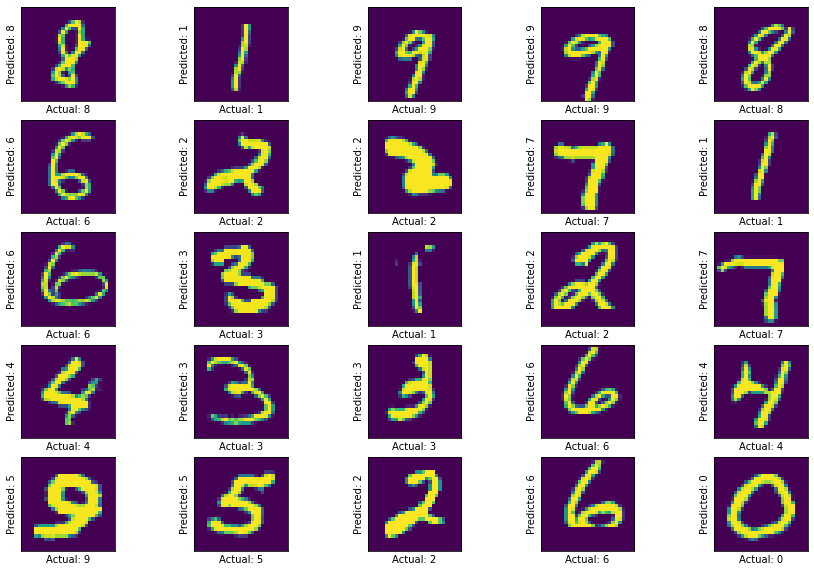

In [28]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(y_test[i]))
    plt.ylabel("Predicted: {}".format(test_pred[i]))

### Final test data

In [29]:
final_pred = model.predict(df_test)

In [30]:
final_pred = [np.argmax(i) for i in final_pred]

In [31]:
final_pred[:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]

In [32]:
submission_format = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
submission_format.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [33]:
len(submission_format.ImageId)

28000

In [34]:
submission_format.ImageId.nunique()

28000

In [35]:
final_pred = pd.DataFrame(final_pred)
final_pred.columns =['Label']

In [36]:
final = pd.concat([pd.Series(range(1,28001),name="ImageId"),final_pred],axis=1)

In [37]:
final.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
